In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Prepare data
## 1.1 Get your X and y in the right shape

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

# diabetes #dictionary of numpy arrays - bunch

print("Features: ", diabetes.feature_names)

Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
# features
X = diabetes.data
print(X.shape) #(442 = number of samples, 10 = features)(m, n)
X

(442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [4]:

m = X.shape[0] # # of samples
n = X.shape[1] # # of features
print(X[0])  #big letter X represents matrix

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [5]:
# target
y = diabetes.target

print(y.shape) #small letter y represents vector
print("values",y[0:3])
print(y[0])

(442,)
values [151.  75. 141.]
151.0


In [6]:

assert m == y.shape[0]

In [7]:
# 1.2 Split Train test split your data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
y_test.shape

(89,)

In [9]:
# Feature scale your data to reach faster convergence
print(X_train[0])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

[-0.07453279 -0.04464164 -0.0105172  -0.00567042 -0.06623874 -0.0570543
 -0.00290283 -0.03949338 -0.04257085 -0.0010777 ]


In [10]:

X_train[0]

array([-1.59793885, -0.92096012, -0.26267018, -0.13485948, -1.35101959,
       -1.15461722, -0.08578926, -0.81496543, -0.9033754 ,  0.0086281 ])

In [11]:
# 1.4 Add intercepts
'''
y = mx + b
y = 2*2 + 3*1 + w0

X = [1 2 3     @ [w0
     1 4 6        w1=2
     1 9 10]      w2=1
     
X @ w = [7
         14
         28 ]

Typical hypothesis function in linear regression:  Theta^T x
'''

'\ny = mx + b\ny = 2*2 + 3*1 + w0\n\nX = [1 2 3     @ [w0\n     1 4 6        w1=2\n     1 9 10]      w2=1\n\nX @ w = [7\n         14\n         28 ]\n\nTypical hypothesis function in linear regression:  Theta^T x\n'

In [12]:

intercept = np.ones((X_train.shape[0], 1)) # add 1 
X_train = np.concatenate((intercept, X_train), axis = 1)
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis = 1)
X_test[0]

array([ 1.        , -0.28632197, -0.92096012, -0.53411952, -0.84894757,
       -0.33028493,  0.11412896, -0.4016548 , -0.0287965 , -0.81546888,
       -0.77455724])

In [13]:
# 1.5. Feature Engineering (optional)

# It is sometimes useful to engineer new features (e.g., polynomial, kernels) so to create some non-linear relationships with your target. Here we gonna skip


from time import time

theta = np.zeros(X_train.shape[1])

lr = 0.001 #alpha

max_iter = 50

#three steps to gradient descent

start = time()

for i in range(max_iter):
    #1. prediction
    # X @ w
    print(f"step{i}")
    y_hat = X_train @ theta

    #2. calculate gradient
    # grad = X^T (h - y)
    grad = X_train.T @ (y_hat - y_train)

    #3. update the theta
    # w = w - lr * grad
    theta = theta - lr * grad
    print(theta)

time_taken = time() - start

print("Time taken: ", time_taken)
print("Theta: ", theta)

step0
[ 53.646        4.96154657   0.91426894  16.21925946  11.82105323
   5.64501673   4.85261143 -11.17359618  12.33050649  15.63796642
  10.46231265]
step1
[88.354962    1.23266818 -5.07574807 16.62130385  9.99150503 -1.78504099
 -3.52784658 -8.71120023  6.17435972 13.24983161  5.60942815]
step2
[110.81166041   1.88348508  -6.55941543  21.2658395   12.76835837
  -1.07714174  -3.3767792  -10.90500344   8.63228427  17.5584173
   7.04229539]
step3
[125.34114429   0.93673989  -8.86282177  22.29058099  12.69119911
  -2.80935448  -5.56390991 -10.35090552   7.49754281  17.99389551
   5.49434479]
step4
[134.74172035   0.93707761  -9.90300424  23.83469388  13.43273854
  -2.85232345  -5.88820743 -10.69060134   8.1018252   19.53407788
   5.2578741 ]
step5
[140.82389307   0.67377942 -10.85423159  24.45311922  13.55223798
  -3.33488915  -6.56234787 -10.47131421   8.01326272  20.14815909
   4.50385452]
step6
[144.75905882   0.63108969 -11.38694375  25.03631303  13.79681587
  -3.46004431  -6.79343

In [14]:

diabetes.feature_names


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [15]:
## 2.2 Compute accuracy/loss

#for regression, mean squared error
#for classification, accuracy, recall, precision


def mse(yhat, y):
   return  ((yhat - y)**2).sum() / yhat.shape[0]


#training mse
yhat_train = X_train @ theta

mse_train = mse(yhat_train, y_train)

print("MSE train: ", mse_train)

#testing mse

yhat_test = X_test @ theta

mse_test = mse(yhat_test, y_test)

print("MSE test: ", mse_test)


MSE train:  2878.3830718522254
MSE test:  2974.1064389011026


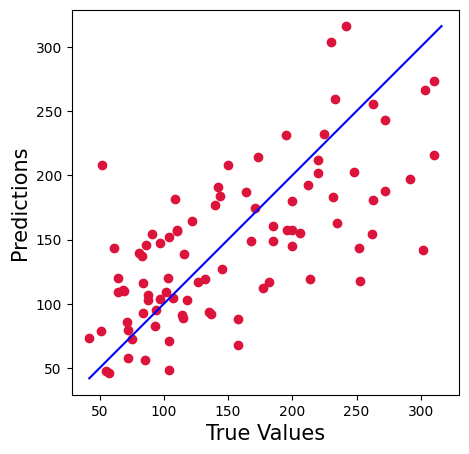

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_test, yhat_test, c='crimson')

p1 = max(max(yhat_test), max(y_test))
p2 = min(min(yhat_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [17]:
#inference 

X_train[0]

my_sample = np.array([3, -0.3, -0.95877769, -1.07310168, -0.71363498,
       -0.94063341, -0.75663014,  0.30179749, -0.77440695, -1.36631681,
       -0.59408791])

In [18]:
X_test[0]

array([ 1.        , -0.28632197, -0.92096012, -0.53411952, -0.84894757,
       -0.33028493,  0.11412896, -0.4016548 , -0.0287965 , -0.81546888,
       -0.77455724])

In [19]:

print('Sample value test -->',X_test[0] @ theta)

print('predicted value -->',y_test[0])

Sample value test --> 120.30698657261017
predicted value --> 64.0
